In [ ]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chirruu","key":"cd16d09d509fe631184a948093dd5919"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d oddrationale/mnist-in-csv

Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
  0% 0.00/15.2M [00:00<?, ?B/s]
100% 15.2M/15.2M [00:00<00:00, 898MB/s]


In [ ]:
# Unzip the dataset
!unzip mnist-in-csv.zip

Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


Train shape: (60000, 785)
Test shape: (10000, 785)
Original x_train shape: (60000, 784)
Original y_train shape: (60000,)


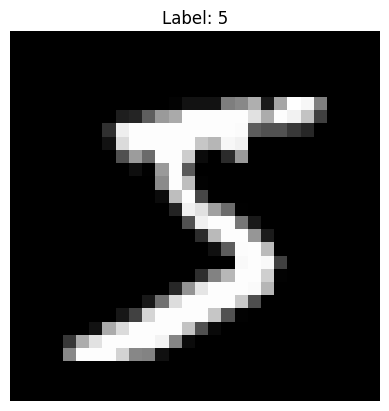

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load CSV data
train_df = pd.read_csv('/content/mnist_train.csv')
test_df = pd.read_csv('/content/mnist_test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Split features and labels
x_train = train_df.iloc[:, 1:].values  # all pixel columns
y_train = train_df.iloc[:, 0].values   # label column

x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print("Original x_train shape:", x_train.shape)
print("Original y_train shape:", y_train.shape)

# Normalize pixel values (0–255 to 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Show one example image
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the Sequential CNN model
model = Sequential([
    # 1st Convolution Layer
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),

    # 2nd Convolution Layer (Optional for better accuracy)
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten before Fully Connected Layers
    Flatten(),

    # Fully Connected Dense Layer
    Dense(units=128, activation='relu'),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Output Layer
    Dense(units=10, activation='softmax')  # 10 classes (digits 0–9)
])

# Summary of model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Use one-hot encoded labels if you used to_categorical()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=128,
    verbose=2
)


Epoch 1/10
422/422 - 9s - 21ms/step - accuracy: 0.9244 - loss: 0.2506 - val_accuracy: 0.9840 - val_loss: 0.0573
Epoch 2/10
422/422 - 2s - 4ms/step - accuracy: 0.9785 - loss: 0.0714 - val_accuracy: 0.9888 - val_loss: 0.0439
Epoch 3/10
422/422 - 2s - 4ms/step - accuracy: 0.9842 - loss: 0.0510 - val_accuracy: 0.9895 - val_loss: 0.0409
Epoch 4/10
422/422 - 3s - 7ms/step - accuracy: 0.9879 - loss: 0.0405 - val_accuracy: 0.9888 - val_loss: 0.0393
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9902 - val_loss: 0.0343
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9909 - loss: 0.0275 - val_accuracy: 0.9920 - val_loss: 0.0330
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9923 - val_loss: 0.0312
Epoch 8/10
422/422 - 3s - 6ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9918 - val_loss: 0.0344
Epoch 9/10
422/422 - 3s - 7ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9922 - val_loss: 0.0339


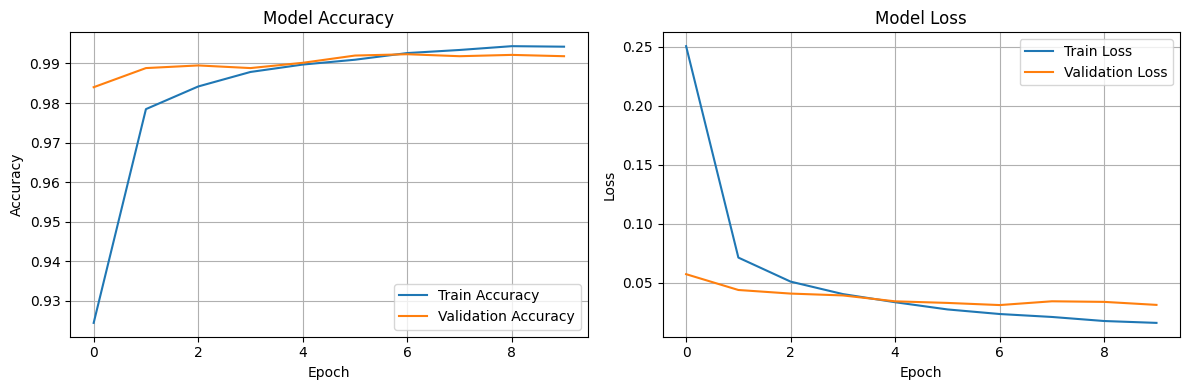

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=2)

print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"📉 Test Loss: {test_loss:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.9912 - loss: 0.0249

✅ Test Accuracy: 0.9912
📉 Test Loss: 0.0249


In [ ]:
# Save the entire model as a .h5 file
model.save('mnist_cnn_model.h5')

print("✅ Model saved as mnist_cnn_model.h5")


✅ Model saved as mnist_cnn_model.h5


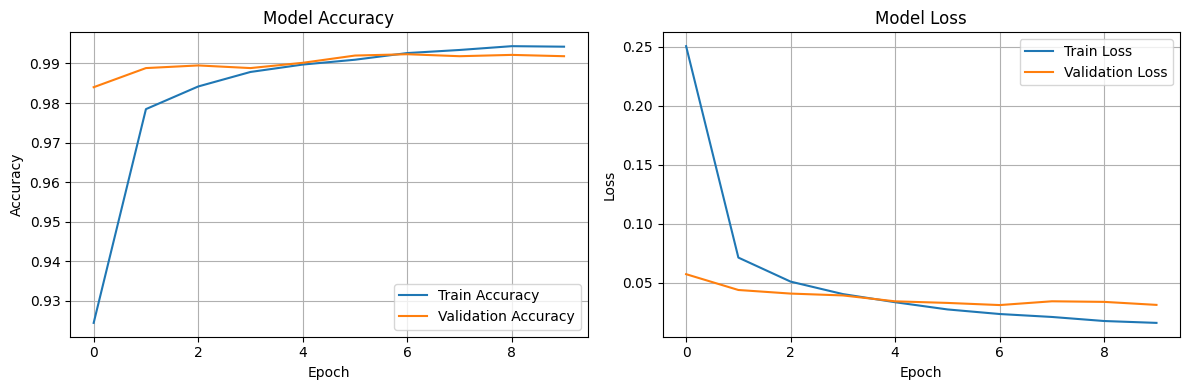

In [ ]:
# Plot accuracy and loss again
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


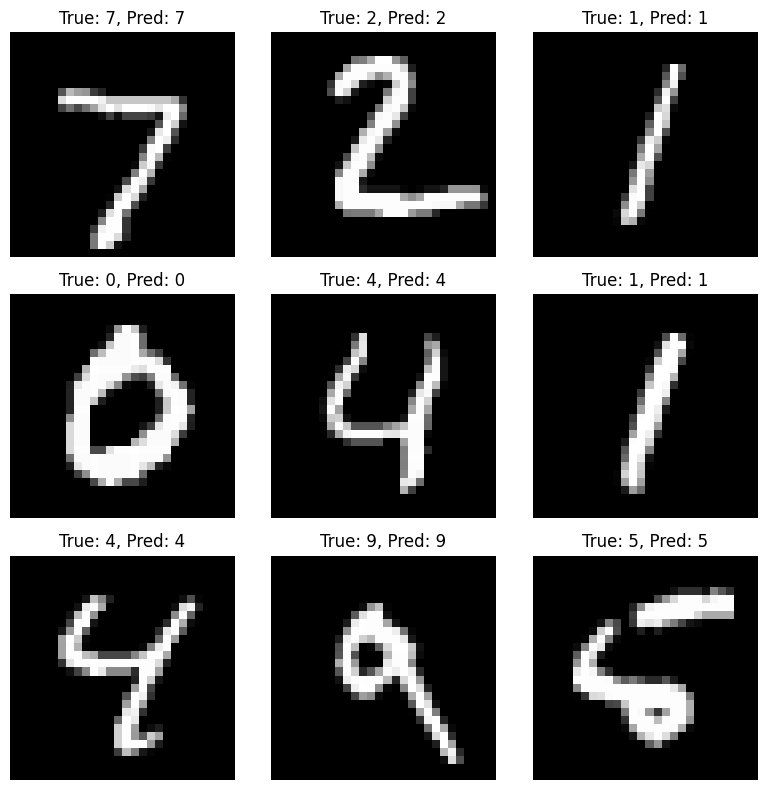

In [ ]:
import numpy as np

# Predict classes
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Show 9 predictions
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test_cat[i])}, Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
